## CNN_Test_1

In [1]:
##Q1

## B. Extract spatial features

In [2]:
## Q2

## B Reduce computation by Downsampling

In [3]:
## Q3

## B ReLU

In [4]:
## Q4

## C. The step size while sliding the filter

In [5]:
## Q5

## B. Preserve spatial dimensions of the input

In [6]:
## Q6

## C. Increases

In [7]:
## Q7

## D. Recurrent layer

In [8]:
## Q8

## B. Max pooling

In [9]:
## Q9

## A. filter used to extract features from an image

In [10]:
## Q10

## D. All of the above

In [11]:
## Q11

## C. 227x227

In [12]:
## Q12

## B. 5

In [13]:
## Q13

## A. To make training faster

In [14]:
## Q14

## A. SGD with momentum

In [15]:
## Q15

## A. Dropout

In [16]:
## Q16

## A. Very deep networks with small convolutional filters

In [17]:
## Q17

## C. 3x3

In [18]:
## Q18

## D. VGG19

In [19]:
## Q19

## B. High computational and memory requirements

In [20]:
## Q20

## C. Same padding

Question:
Design and implement a Convolutional Neural Network (CNN) model to classify images into three categories: cats, dogs, and snakes, using the provided dataset. Ensure the following:
Dataset Download Link

In [4]:
import zipfile

zip_path = r'C:\\Users\\Dell\\Desktop\\AI&ML internship\\New folder\\CNN dataset.zip'
extract_to = r'C:\\Users\\Dell\\Desktop\\AI&ML internship\\New folder\\CNN dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped successfully.")

Dataset unzipped successfully.


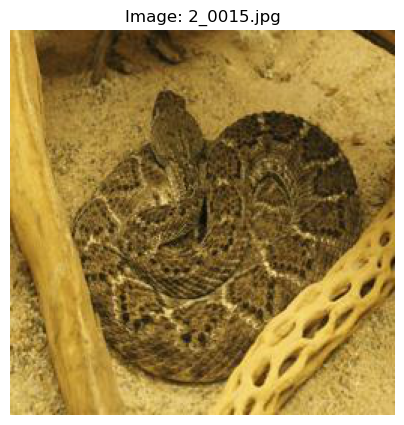

In [5]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Path to your dataset
dataset_path = r'C:\\Users\\Dell\\Desktop\\AI&ML internship\\New folder\\CNN dataset\\Animals'

# Get all image file paths from subdirectories
all_images = []
for root, dirs, files in os.walk(dataset_path):  # Recursively go through subdirectories
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Check for valid image formats
            all_images.append(os.path.join(root, file))

# Ensure there are images to select
if len(all_images) == 0:
    raise ValueError("No image files found in the specified dataset path.")

# Select a random image
random_image_path = random.choice(all_images)

# Load and display the image
img = Image.open(random_image_path)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Image: {os.path.basename(random_image_path)}")
plt.axis('off')
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

# Path to the dataset directory
dataset_path = r"C:\\Users\\Dell\\Desktop\\AI&ML internship\\New folder\\CNN dataset\\Animals"  # Replace with your dataset path

# Parameters
image_size = (224, 224)  # Resize images to 224x224
batch_size = 32         # Batch size for training

# Step 1: Data Augmentation and Normalization
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    rotation_range=30,      # Rotate images randomly by 30 degrees
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    validation_split=0.2    # Reserve 20% for validation
)

# Step 2: Create Training and Validation Generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",  # Use categorical for multi-class labels
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Step 3: Verify the Class Indices (One-Hot Encoding)
print(f"Class indices: {train_generator.class_indices}")

# Step 4: Access a Batch of Preprocessed Images and Labels
images, labels = next(train_generator)
print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")

Found 331 images belonging to 3 classes.
Found 81 images belonging to 3 classes.
Class indices: {'cats': 0, 'dogs': 1, 'snakes': 2}
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 3)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess dataset manually
images, labels = [], []
classes = os.listdir(dataset_path)

for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for image_file in os.listdir(class_path):
        img_path = os.path.join(class_path, image_file)
        img = load_img(img_path, target_size=image_size)  # Resize
        img_array = img_to_array(img) / 255.0            # Normalize
        images.append(img_array)
        labels.append(label)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode labels
labels = to_categorical(labels, num_classes=len(classes))

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Validation data shape: {x_val.shape}, {y_val.shape}")

Training data shape: (329, 224, 224, 3), (329, 3)
Validation data shape: (83, 224, 224, 3), (83, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the CNN model
model = Sequential()

# Input layer (implicitly included in the first Conv2D layer)

# Convolutional Layer 1 + Max Pooling
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2 + Max Pooling
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units=128, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      44,302,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,404,163 (169.39 MB)

 Trainable params: 44,404,163 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the optimizer and learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=16,  # Train for 15-20 epochs
    batch_size=32,  # Batch size of 32
    callbacks=[early_stopping]
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4300 - loss: 1.0958 - val_accuracy: 0.3976 - val_loss: 1.1075
Epoch 2/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5129 - loss: 0.9686 - val_accuracy: 0.4578 - val_loss: 1.2941
Epoch 3/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5917 - loss: 0.7843 - val_accuracy: 0.4940 - val_loss: 1.1636
Epoch 4/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7259 - loss: 0.5876 - val_accuracy: 0.5663 - val_loss: 1.0927
Epoch 5/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8697 - loss: 0.3842 - val_accuracy: 0.5301 - val_loss: 1.5676
Epoch 6/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8892 - loss: 0.3318 - val_accuracy: 0.4940 - val_loss: 1.5538
Epoch 7/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9712 - loss: 0.1393 - val_accuracy: 0.5663 - val_loss: 1.8056
Epoch 8/16
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9642 - loss: 0.0921 - val_accuracy: 0.5663 - val_loss: